In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

f is monotically increasing

Taylor expansion at point zero is given by the summation series $T_n = \sum\limits_{i=0}^n x^i \frac{1+(-1)^i}{2^(3+i)} $

That means the maximum error will be at the boundaries. i.e $x=\pm 1$

For n=0 we will have the maximum maximum error. Which implies that 

$\min\limits_{q\in P_n} \left||f-q\right||_{\infty,[-1,1]} \le \frac{1}{3}-\frac{2}{8}$

In [25]:
# Original function
def f(x): 
    return 1/(4-np.power(x,2))

# Taylor expansion generator based on the above formula
def T(n):
    def T_n(x):
        s = 0
        for i in range(n):
            s+= x**i * (1+(-1)**i) / (2**(3+i))
        return s
    return T_n

# Error at point x=1 
def err(n):
    return abs(f(1)-T(n)(1))

Create interpolation function based on Chebysev points and Neville scheme

In [26]:
def chebysev_points(n):
    '''Returns n+1 Chebysev points in range [-1,1]'''
    points = np.zeros(n+1)
    for i in range(n+1):
        points[i] = np.cos(((2*i+1)/(2*n+2))*np.pi)
    return points

In [27]:
def neville(knots,f):
    """
    Perform polynomial interpolation using Neville's algorithm.

    Parameters
    ----------
    knots : numpy.ndarray
        An array of x-values (knots) at which the function is known.
    f : numpy.ndarray
        An array of corresponding function values at the knots.

    Returns
    -------
    List[List[Callable]]
        A matrix that contains every polynomial at the neville sheme. Matrix[0,N] is the interpolation polynomial that can be used to find interpolated values at specific points.

    Notes
    -----
    The interpolation function takes a single argument (x) and returns the interpolated value at that point.
    """
    
    N = len(knots)

    def interpolation(x):
        matrix = np.zeros((N,N))
        matrix[:,0] = f

        for col in range(1, N):
            for row in range(0, N-col):
                matrix[row, col] = ((x-knots[row])*matrix[row+1, col-1] - (x-knots[row+col])*matrix[row, col-1]) / (knots[row+col]-knots[row])
        
        return matrix

    return interpolation

In [28]:
def interpolation_Chebysev(func, n):
    knots = chebysev_points(n)
    vals = func(knots)
    return lambda x: neville(knots, vals)(x)[0,-1]


Implement functions for calculating the pointwise error for a given func

In [30]:
def error(func_a, func_b):
    def err(x):
        return  abs(func_a(x)-func_b(x))
    return err

auxilary graph

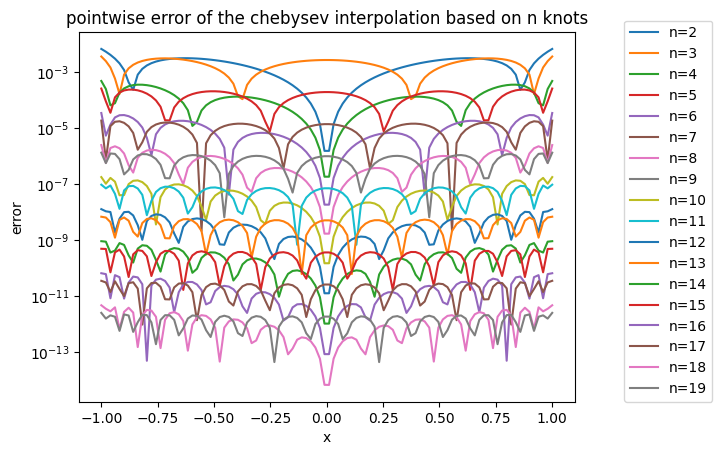

In [34]:
x = np.linspace(-1,1, 100, endpoint=True)
fig, ax = plt.subplots(1,1)
for n in range(2,20):
    ax.plot(x, list(map(error(f, interpolation_Chebysev(f, n)),x)), label=f'n={n}')
    ax.set(yscale='log', xlabel='x', ylabel='error', title='pointwise error of the chebysev interpolation based on n knots')
ax.legend(loc=(1.1,0.0))

Calculating max of errors in the interval [-1,1] both for chebysev interpolation and taylor expansion till 2n order

In [44]:
x = np.linspace(-1,1, 100, endpoint=True)
n = np.arange(1,20)
max_errors_chebysev = []
max_errors_Taylor = []
for i in n:
    max_errors_chebysev.append(max(list(map(error(f, interpolation_Chebysev(f, i)),x))))
    max_errors_Taylor.append(max(list(map(error(f, T(2*i)),x))))


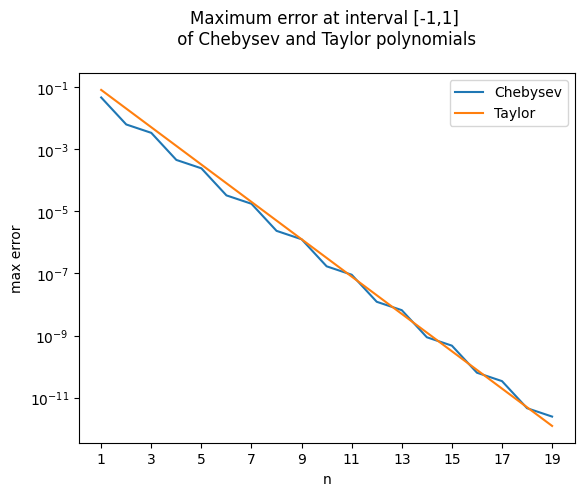

In [45]:

fig, ax = plt.subplots(1,1)
n = np.arange(1,20)
ax.plot(n, max_errors_chebysev, label='Chebysev')
ax.plot(n, max_errors_Taylor, label='Taylor')
ax.set(yscale='log', xlabel='n', ylabel='max error' , title='Maximum error at interval [-1,1] \n of Chebysev and Taylor polynomials \n', xticks=n[::2])
ax.legend()